<a href="https://colab.research.google.com/github/brunomoraisnc/intro-to-artificial-intelligence-ifb/blob/master/Avalia%C3%A7%C3%A3o_01_Bruno_Morais_Neves_de_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Federal de Brasília

#### ALUNO: BRUNO MORAIS NEVES DE CASTRO

#### Tecnologia em Sistemas para Internet

Brasília, 17 de Setembro de 2018

# Base de Dados


### 1.Escolher uma base de classificação do repositório UCI – machine learning
A base escolhida foi a Qualitative Bankruptcy (https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy). 


   

### 2.Fazer uma breve descrição sobre a base e o problema a ser resolvido
Trata-se de um conjunto de análises de especialistas em indicadores de falência levantado pelo artigo "The discovery of experts’ decision rules from qualitative bankruptcy data using genetic algorithms", elaborado por Myoung-Jong Kim e Ingoo Han
(http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.97.3314&rep=rep1&type=pdf) . O compilado foi construído a partir do seguinte questionário de um considerável banco da Índia:

- #### Vetor de características:

    IR Industrial Risk: {P,A,N}
    
    MR Management Risk: {P,A,N} 
    
    FF Financial Flexibility: {P,A,N} 
    
    CR Credibility: {P,A,N} 
    
    CO Competitiveness: {P,A,N} 
    
    OP Operating Risk: {P,A,N} 
    
    Classe: {B,NB}
    
P -> Positive; A -> Average; N -> Negative; B -> Bankruptcy; NB -> Non-bankruptcy

##### Com o proposto, o objetivo é o treinamento de uma Rede Neural Artificial (RNA) para identificação de possíveis futuros devedores, ou seja, com grande potencial de Bankruptcy (falência).

### 3.Descrever o pré-processamento aplicado nos dados, caso tenha sido necessário, apresentando a fórmula de normalização utilizada, bem como, o intervalo gerado após a transformação.

Seguindo o artigo,

P -> Positive; A -> Average; N -> Negative; B -> Bankruptcy; NB -> Non-bankruptcy

Foi modificado para:

1 -> Positive; 2 -> Average; 3 -> Negative; 1 -> Bankruptcy; 0 -> Non-bankruptcy

In [0]:
# Importação biblioteca Numpy
import numpy as np

# Importação biblioteca Pandas
import pandas as pd

# Importação biblioteca Matplotlib
from matplotlib import pyplot as plt

# Importação do Scikit-learn
from sklearn.neural_network import MLPClassifier # Classificador
from sklearn.model_selection import train_test_split # Método para divisão de dataframe

# Para visualização dos gráficos do Matplotlib gerados no Jupyter Notebook
%matplotlib inline

In [0]:
# Leitura do arquivo Comma-separated Values (CSV)
data=pd.read_csv('qualitative_bankruptcy_limpo.txt', header=0)

#### 3.1 Visualização do Data Set

In [0]:
# Início
data.head()

,IR,MR,FF,CR,CO,OP,Classe
0,3,3,2,2,2,3,0
1,1,1,2,2,2,1,0
2,2,2,2,2,2,2,0
3,3,3,3,3,3,3,0
4,1,1,3,3,3,1,0


In [0]:
# Fim
data.tail()

,IR,MR,FF,CR,CO,OP,Classe
245,1,1,2,1,1,1,1
246,3,1,1,1,1,1,1
247,2,1,1,1,1,1,1
248,1,1,1,1,1,1,1
249,3,1,1,1,2,2,1


In [0]:
# Checagem de colunas e valores por coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR        250 non-null int64
MR        250 non-null int64
FF        250 non-null int64
CR        250 non-null int64
CO        250 non-null int64
OP        250 non-null int64
Classe    250 non-null int64
dtypes: int64(7)
memory usage: 13.8 KB


#### 3.2 Etapa de Normalização

#### 3.2.1 Separando o vetor de caraterísticas
- X -> características
- y -> respostas

#!jupyter nbconvert --to script Neural_network_trabalho012.ipynb

In [0]:
# y é um array numpy que contém os valores da coluna Classe (O .values que transforma para np.array)
y = data.loc[:,'Classe'].values

# X é um dataframe do Pandas com os valores das demais colunas
X = data.drop('Classe', 1)

In [0]:
# Colunas de X
X.columns

Index(['IR', 'MR', 'FF', 'CR', 'CO', 'OP'], dtype='object')

In [0]:
# Valores de y
print('y HEAD')
print(y[0:5])
print('\ny TAIL')
print(y[245:250])

y HEAD
[0 0 0 0 0]

y TAIL
[1 1 1 1 1]


#### 3.2.2 Fórmula de Normalização utilizada:
(X-X.min())/(X.max()-X.min()) - COLOCAR IMG DPS

In [0]:
# Fórmula de normalização
X=(X-X.min())/(X.max()-X.min())
#normalized_df=(X-X.mean())/X.std()

# Visualização pós-normalização
X.head()

,IR,MR,FF,CR,CO,OP
0,1.0,1.0,0.5,0.5,0.5,1.0
1,0.0,0.0,0.5,0.5,0.5,0.0
2,0.5,0.5,0.5,0.5,0.5,0.5
3,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0


##### 3.2.3 INTERVALO GERADO APÓS A TRANSFORMAÇÃO:
- 0 a 1

In [0]:
X.min()

IR    0.0
MR    0.0
FF    0.0
CR    0.0
CO    0.0
OP    0.0
dtype: float64

In [0]:
X.max()

IR    1.0
MR    1.0
FF    1.0
CR    1.0
CO    1.0
OP    1.0
dtype: float64

### 4.Explicar como foi feita a divisão da base para treinamento e teste

In [0]:
# Método train_test_split do Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state=21, test_size=0.6, stratify=y)
#21

In [0]:
print('Proporção de Y_train:')
# Non-bankrupt
print(len(y_train[y_train == 0]) / len(y[y == 0]))
# Bankrupt
print(len(y_train[y_train == 1]) / len(y[y == 1]))

Proporção de Y_train:
0.3986013986013986
0.40186915887850466


In [0]:
# X para TREINAMENTO
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 21 to 27
Data columns (total 6 columns):
IR    100 non-null float64
MR    100 non-null float64
FF    100 non-null float64
CR    100 non-null float64
CO    100 non-null float64
OP    100 non-null float64
dtypes: float64(6)
memory usage: 5.5 KB


In [0]:
# X para TESTE
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 175 to 186
Data columns (total 6 columns):
IR    150 non-null float64
MR    150 non-null float64
FF    150 non-null float64
CR    150 non-null float64
CO    150 non-null float64
OP    150 non-null float64
dtypes: float64(6)
memory usage: 8.2 KB


#### Pelos índices, é possível notar que foram separados randomicamente

In [0]:
X_train.head(10).index

Int64Index([21, 31, 198, 22, 203, 3, 211, 173, 200, 77], dtype='int64')

In [0]:
X_test.head(10).index

Int64Index([175, 90, 223, 227, 188, 165, 135, 124, 187, 185], dtype='int64')

# Arquitetura da RNA

In [0]:
# Cross-validation
from sklearn.model_selection import cross_val_score

### Classificadores

### A1 (com Momentum)

- função de ativação = rectifier
- quantidade máxima de épocas = 1000
- taxa de aprendizagem = não específicada, pois só funciona em 'sgd'
- termo momentum = 0.7

'relu' -> ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

In [0]:
it = np.arange(1,10)
#for i in it:
#    nn=MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(i,), random_state=1, max_iter=5000, momentum=0.7)
#    scores = cross_val_score(nn, X, y, cv=5)
#    print(scores.mean().tolist())

# Cross-validation
nn=MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(5,), random_state=0, max_iter=5000, momentum=0.7)
scores = cross_val_score(nn, X, y, cv=5)
print('Cross-validation:')
scores

Cross-validation:


array([0.96078431, 0.92156863, 0.96      , 0.97959184, 1.        ])

#### Indica a melhor configuração de classificador para o df

from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)]
        }
]

clf = GridSearchCV(nn, param_grid, cv=3, scoring='accuracy')
clf.fit(X,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

### A2 (Melhor classificador indicado)

- função de ativação = sigmoid
- quantidade máxima de épocas = 1000
- taxa de aprendizagem = não específicada, pois só funciona em 'sgd'
- termo momentum = não específicada, pois só funciona em 'sgd'

logistic -> ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

lbfgs -> ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

In [0]:
nn=MLPClassifier(activation='logistic', solver='lbfgs', random_state=0, hidden_layer_sizes=(3,))

# Cross-validation
scores = cross_val_score(nn, X, y, cv=4)
print('Cross-validation:')
scores.tolist()

Cross-validation:


[1.0, 1.0, 0.9841269841269841, 1.0]

### A3

- função de ativação = sigmoid
- quantidade máxima de épocas = 1000
- taxa de aprendizagem = 0.001

logistic -> ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

sgd -> ‘sgd’ refers to stochastic gradient descent.


In [0]:
# Testando com diferentes quantidades de neurônios
#it = np.arange(1,10)
#for i in it:
#    nn=MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(i,), random_state=1, max_iter=1000)
#    nn.fit(X_train, y_train)
#    nn.score(X_test, y_test)    
#    scores = cross_val_score(nn, X, y, cv=5)
#    print(scores.tolist())
    
nn=MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(3,), random_state=1, max_iter=1000)
scores = cross_val_score(nn, X, y, cv=5)
print('Cross-validation:')
scores.tolist()

Cross-validation:


[0.8823529411764706,
 0.9215686274509803,
 0.9,
 0.7959183673469388,
 0.7142857142857143]

### Curva de Aprendizado

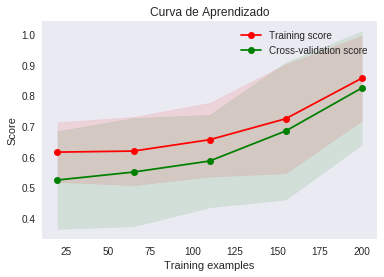

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Método train_test_split do Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state=1, test_size=0.6, stratify=y)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Curva de Aprendizado"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(nn, title, X, y, cv=cv, n_jobs=4)

plt.show()

# Fontes:

https://www.one-tab.com/page/IGwIZ-T3R0y7rhSPWyswfQ

https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy#

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.97.3314&rep=rep1&type=pdf

https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

https://juliocprocha.wordpress.com/2017/04/01/bias-e-varianciaunderfitting-e-overfitting/

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

https://www.quora.com/How-do-we-detect-overfitting-and-under-fitting-in-Machine-Learning

http://scikit-learn.org/stable/modules/model_evaluation.html

https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent

http://scikit-learn.org/stable/modules/cross_validation.html

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.drop.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

http://scikit-learn.org/stable/modules/preprocessing.html

https://www.sciencedirect.com/science/article/abs/pii/037872069390064Z

https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-using-del-df-column-name

https://www.kaggle.com/ahmethamzaemra/mlpclassifier-example

https://www.python-course.eu/neural_networks_with_scikit.php

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=12

https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

http://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting

http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

https://www.youtube.com/watch?v=X8SPO875mQY

https://www.kaggle.com/c/digit-recognizer/data